In [1]:
from pathlib import Path
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
sns.set(font="IPAexGothic")

In [2]:
train_df = pd.read_csv('data/train.csv')
print(train_df.shape)
display(train_df.head())
display(train_df.describe())

test_df = pd.read_csv('tutorial_preprocessed_test.csv')
print(test_df.shape)
display(test_df.head())
display(test_df.describe())

train_df['year'] = train_df['date']//10000
test_df['year'] = test_df['date']//10000
train_df['month'] = train_df['date'].apply(lambda x: int(str(x)[4:6]))
test_df['month'] = test_df['date'].apply(lambda x: int(str(x)[4:6]))

(77751, 7)


,kind,date,amount,mode_price,area,year,weekno
0,だいこん,20051107,201445,735.0,千葉,2005,45
1,だいこん,20051108,189660,840.0,千葉_各地_青森,2005,45
2,だいこん,20051110,218166,735.0,千葉_各地_青森,2005,45
3,だいこん,20051111,182624,682.5,千葉_青森,2005,45
4,だいこん,20051112,220691,682.5,千葉_青森,2005,45


,date,amount,mode_price,year,weekno
count,7.775100e+04,77751.000000,77751.000000,77751.000000,77751.000000
mean,2.013877e+07,95887.452226,1356.434808,2013.810768,26.707026
std,4.854497e+04,89144.001937,1449.359625,4.856027,14.550173
min,2.005111e+07,1.000000,18.500000,2005.000000,1.000000
25%,2.010030e+07,23358.500000,194.000000,2010.000000,15.000000
50%,2.014051e+07,70549.000000,1188.000000,2014.000000,26.000000
75%,2.018061e+07,141855.500000,1837.500000,2018.000000,39.000000
max,2.022103e+07,965216.000000,25920.000000,2022.000000,53.000000


(315, 7)


,kind,date,amount,mode_price,area,year,weekno
0,だいこん,20221101,NaN,NaN,千葉_全国_横浜,2022,44
1,だいこん,20221102,NaN,NaN,千葉_全国_横浜,2022,44
2,だいこん,20221104,NaN,NaN,千葉_全国_横浜,2022,44
3,だいこん,20221105,NaN,NaN,千葉_全国_横浜,2022,44
4,だいこん,20221107,NaN,NaN,千葉_全国_横浜,2022,45


,date,amount,mode_price,year,weekno
count,3.150000e+02,0.0,0.0,315.0,315.000000
mean,2.022112e+07,NaN,NaN,2022.0,45.809524
std,8.550817e+00,NaN,NaN,0.0,1.260082
min,2.022110e+07,NaN,NaN,2022.0,44.000000
25%,2.022111e+07,NaN,NaN,2022.0,45.000000
50%,2.022112e+07,NaN,NaN,2022.0,46.000000
75%,2.022112e+07,NaN,NaN,2022.0,47.000000
max,2.022113e+07,NaN,NaN,2022.0,48.000000


In [3]:
print(f"train_data集計期間: {train_df['date'].min()} ~ {train_df['date'].max()}")
print(f"test_data集計期間: {test_df['date'].min()} ~ {test_df['date'].max()}")

train_data集計期間: 20051107 ~ 20221031
test_data集計期間: 20221101 ~ 20221129


trainデータの期間は2005年11月から2022年10月まで、testデータの期間は2022年の11月のみになっています

In [4]:
train_df.groupby('kind')[['mode_price']].mean().sort_values(by='mode_price', ascending=False)

,mode_price
kind,
まつたけ,12224.080560
うめ,4324.363514
たけのこ,3352.057112
さといも,3116.549048
ピース,2728.024752
セルリー,2588.718666
たまねぎ,2485.390127
かぼちゃ,2360.390580
そらまめ,2110.261187


野菜ごとに大きく価格は異なっています。<br>
従って、野菜種別は説明変数に入れるべき、ないし野菜ごとにモデルを作るべき、と考えます

train, testに入っている野菜種別を見てみます

In [5]:
print(f"train:{train_df['kind'].unique()}")
print(f"test:{test_df['kind'].unique()}")


train:['だいこん' 'かぶ' 'にんじん' 'キャベツ' 'レタス' 'はくさい' 'ほうれんそう' 'ねぎ' 'きゅうり' 'かぼちゃ' 'トマト'
 'ピーマン' 'さといも' 'たまねぎ' 'なましいたけ' 'セルリー' 'さやえんどう' 'なのはな' 'たけのこ' 'ふき' 'うど'
 'そらまめ' 'アスパラガス' 'ピース' 'とうもろこし' 'いんげん' 'えだまめ' 'うめ' 'まつたけ' 'オクラ' 'レイシにがうり'
 'みずな' 'ミニトマト' 'にら' 'えのきだけ' 'しめじ']
test:['だいこん' 'にんじん' 'キャベツ' 'レタス' 'はくさい' 'ほうれんそう' 'ねぎ' 'きゅうり' 'かぼちゃ' 'トマト'
 'ピーマン' 'さといも' 'たまねぎ' 'なましいたけ' 'ミニトマト']


trainにしかない野菜種別が多く存在します。<br>
今回は野菜種別が重要な説明変数と考えるので、trainにしかない野菜種別は除いて学習することとします

In [6]:
kinds = test_df['kind'].unique()
train_df = train_df[train_df['kind'].isin(kinds)]
print(train_df.shape)
train_df

(61214, 8)


,kind,date,amount,mode_price,area,year,weekno,month
0,だいこん,20051107,201445,735.0,千葉,2005,45,11
1,だいこん,20051108,189660,840.0,千葉_各地_青森,2005,45,11
2,だいこん,20051110,218166,735.0,千葉_各地_青森,2005,45,11
3,だいこん,20051111,182624,682.5,千葉_青森,2005,45,11
4,だいこん,20051112,220691,682.5,千葉_青森,2005,45,11
...,...,...,...,...,...,...,...,...
77531,ミニトマト,20221025,22558,194.0,各地,2022,43,10
77532,ミニトマト,20221027,52938,184.0,各地,2022,43,10
77533,ミニトマト,20221028,28493,194.0,各地,2022,43,10
77534,ミニトマト,20221029,43183,184.0,各地,2022,43,10


データを見ると、必ずしも毎日レコードがあるわけではありません。レコードが存在する日数を種類別・月別にカウントしてみます

In [7]:
pd.pivot_table(train_df.query('20211101 <= date <= 20221031'), index='kind', columns='month', values='mode_price', aggfunc='count')

month,1,2,3,4,5,6,7,8,9,10,11,12
kind,,,,,,,,,,,,
かぼちゃ,NaN,NaN,22.0,22.0,20.0,21.0,22.0,21.0,21.0,22.0,22.0,20.0
きゅうり,20.0,20.0,22.0,22.0,20.0,21.0,22.0,21.0,21.0,22.0,22.0,21.0
さといも,20.0,20.0,22.0,NaN,NaN,NaN,NaN,NaN,17.0,22.0,22.0,21.0
たまねぎ,20.0,20.0,22.0,22.0,20.0,21.0,22.0,21.0,21.0,22.0,22.0,21.0
だいこん,20.0,20.0,22.0,22.0,20.0,21.0,22.0,21.0,21.0,22.0,22.0,21.0
なましいたけ,20.0,20.0,22.0,22.0,20.0,NaN,NaN,NaN,21.0,22.0,22.0,21.0
にんじん,20.0,20.0,22.0,22.0,20.0,21.0,22.0,21.0,21.0,22.0,22.0,21.0
ねぎ,20.0,20.0,22.0,22.0,20.0,21.0,22.0,21.0,21.0,22.0,22.0,21.0
はくさい,20.0,20.0,22.0,22.0,20.0,21.0,22.0,21.0,21.0,22.0,22.0,21.0


全ての野菜について、レコード数は月に20日強にとどまっています。<br>
つまり、取引が行われていない日があります。市場に野菜が出ていない可能性もありますが、全ての野菜について取引が行われていない場合、市場自体が空いていないと考えられます

卸売価格の推移をグラフに描画してみます

取引のない日のレコード分ダミーデータを作成して、綺麗に可視化されるようにします

In [8]:
all_df = pd.concat([train_df, test_df]).reset_index(drop=True)
all_df.drop('weekno', axis=1, inplace=True)
max_days = (datetime(2022, 12, 31) - datetime(2005, 1, 1)).days

dum_data = []

for i in range(max_days+1):
    date = datetime(2005, 1, 1) + timedelta(days=i)
    y, wn = date.isocalendar()[0], date.isocalendar()[1]
    date = int(date.strftime('%Y%m%d'))
    m = int(str(date)[4:6])
    dum_data.append(['ダミー', date, 0, 0, 'ダミー', y, m]) #kind, date, amount, mode_price, area, year, month

dum_df = pd.DataFrame(dum_data, columns=all_df.columns)
dum_df.head()

,kind,date,amount,mode_price,area,year,month
0,ダミー,20050101,0,0,ダミー,2004,1
1,ダミー,20050102,0,0,ダミー,2004,1
2,ダミー,20050103,0,0,ダミー,2005,1
3,ダミー,20050104,0,0,ダミー,2005,1
4,ダミー,20050105,0,0,ダミー,2005,1


In [9]:
vis_df = pd.concat([all_df, dum_df])
vis_df = vis_df.query('20161101 <= date <= 20221031').reset_index(drop=True)
vis_df = pd.pivot_table(vis_df, index='date', columns='kind', values='mode_price').reset_index()
vis_df.fillna(0, inplace=True)
vis_df.head()

kind,date,かぼちゃ,きゅうり,さといも,たまねぎ,だいこん,なましいたけ,にんじん,ねぎ,はくさい,ほうれんそう,キャベツ,ダミー,トマト,ピーマン,ミニトマト,レタス
0,20161101,2808.0,2430.0,2376.0,1836.0,1404.0,173.0,2808.0,1620.0,1728.0,130.0,2592.0,0.0,2268.0,86.0,237.5,2700.0
1,20161102,2052.0,2484.0,3078.0,1836.0,1512.0,173.0,2808.0,1512.0,1836.0,140.0,2592.0,0.0,2376.0,86.0,237.5,2700.0
2,20161103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20161104,2106.0,2592.0,3024.0,1512.0,1512.0,173.0,2916.0,1728.0,2160.0,140.0,2592.0,0.0,2376.0,86.0,237.5,2268.0
4,20161105,1998.0,2538.0,2376.0,1836.0,1458.0,173.0,2700.0,1944.0,2700.0,135.0,2592.0,0.0,2376.0,86.0,243.0,2376.0


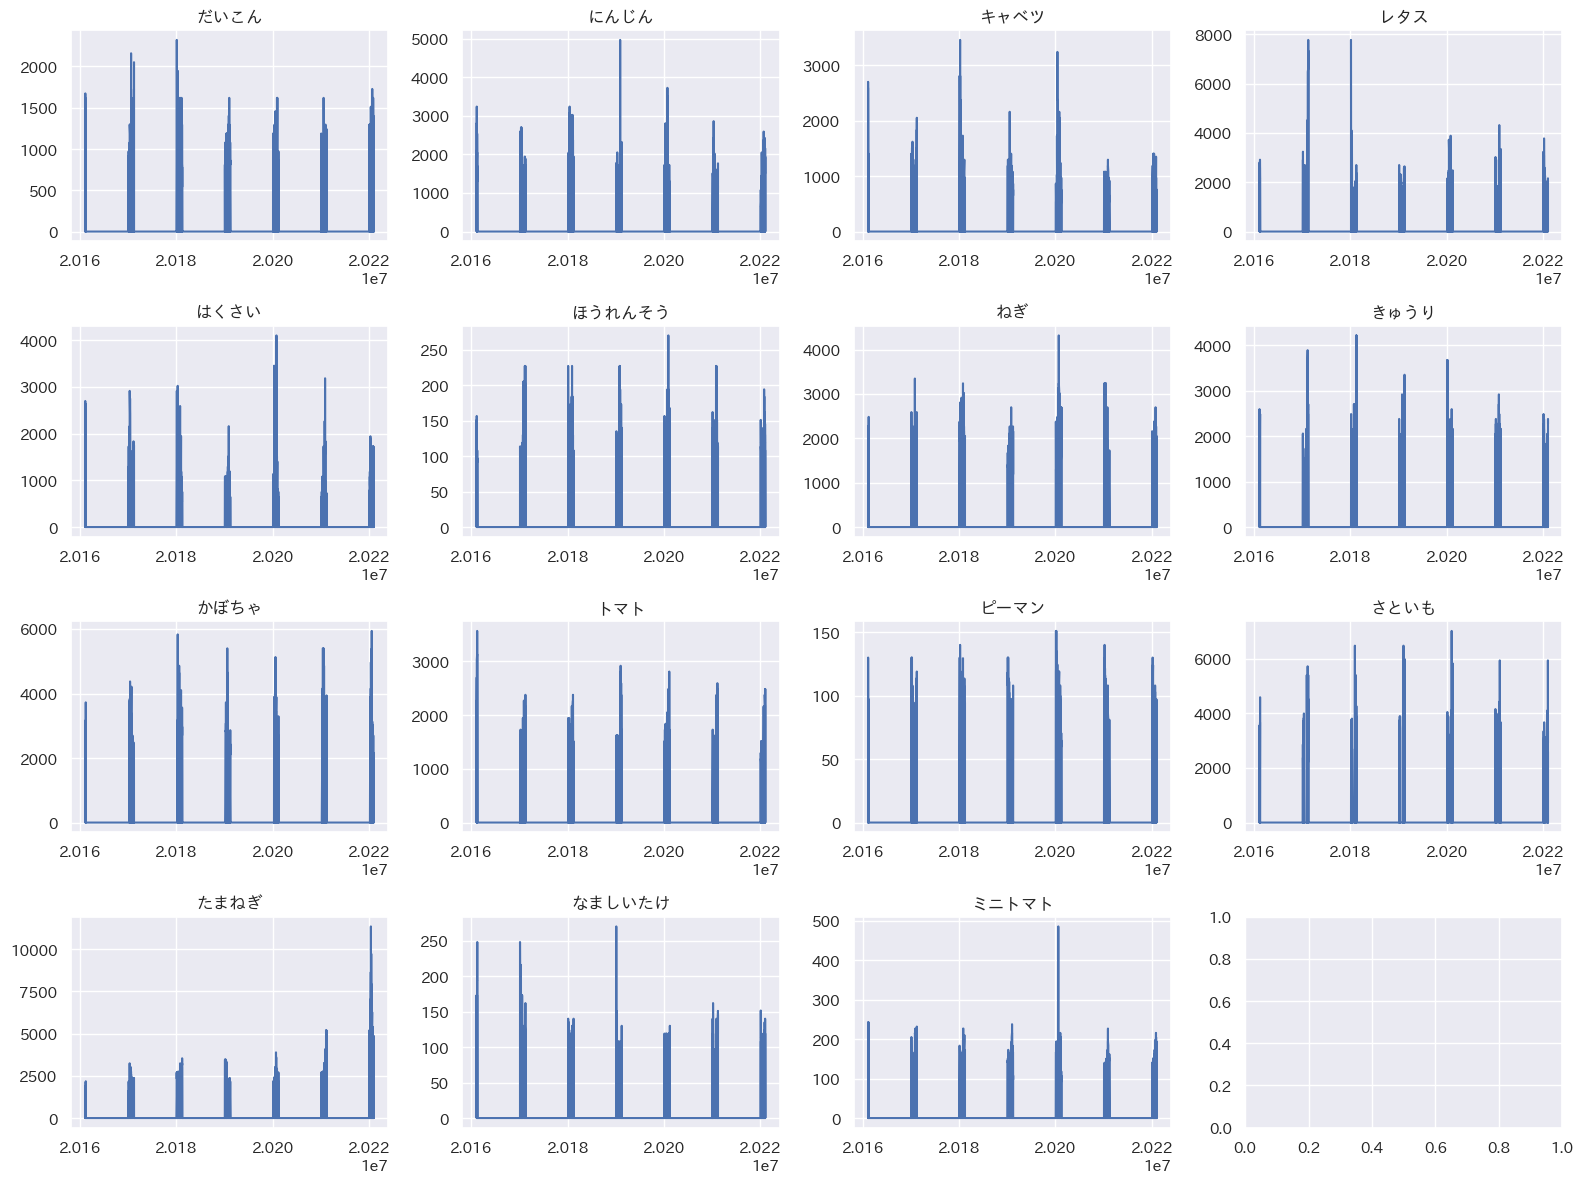

In [10]:
nrow = 4
ncol = 4

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 12))
for i, kind in enumerate(kinds):
    if i < nrow*ncol:
        df = vis_df.loc[:,['date',kind]]
        df.columns = ['date', 'mode_price']
        j = i//ncol
        k = i%ncol
        ax[j, k].plot(df['date'].to_list(), df['mode_price'].to_list())
        ax[j, k].set_title(kind)
plt.tight_layout()
plt.show()
plt.close()

多くの野菜で年によって価格が大きく異なることがわかります。そのため：

- ある月の価格は、前年の価格より前月など直近の価格に近いものになっていると思われる
- 各年の価格の先行指標となる変数を探す必要がある

と言えそうです。